# Define the problem

**It is a classification problem : classify the patients into (Patient has Parkinson / Patient does not have Parkinson) using the attributes from their voice recordings**

# Import necessary packages

In [1]:
# ********** import packages ****************
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
#import os,sys
from sklearn.preprocessing import MinMaxScaler #to scale features
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,f1_score,classification_report
import seaborn as sns
sns.set(color_codes=True) # adds a background to the graphs
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
print('all packages are imported')

all packages are imported


# **Load and prepare data**

In [2]:
#read the data into a DataFrame 
data=pd.read_csv('../input/parkinson-disease/Parkinson disease.csv')
#data.head() # get the first 5 records
display(data)  
#data.head(10).style.background_gradient(cmap="RdYlBu")
 

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


# Data Analysis

In [3]:
#fetch all columns
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [4]:
data.shape

(195, 24)

In [5]:
data.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [6]:
#check for duplicates in the dataset
data[data.duplicated()]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


There are no duplicate entries in the dataset 

In [7]:
print('informations about the dataset')
data.info()
# ensure that there are no Null Values
print("Null Values Check\n")
print(data.isnull().sum())
print("\n\n NAN Values Check \n")
print(data.isna().sum())

informations about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR          

> There are no missing values. Now we can take a look at how many patients are actually suffering from parkinson disease (1) and how many are not (0)

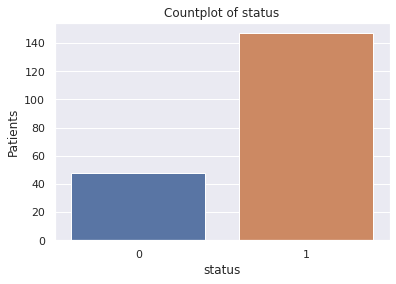

In [8]:
#distribution of status variable.
sns.countplot(data['status'])

# Add labels
plt.title('Countplot of status')
plt.xlabel('status')
plt.ylabel('Patients')
plt.show()

This is an unbalanced dataset,it is fairly skewed towards patients with Parkinsons.

In [9]:
#overview of data
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


**Univariate Analysis**

The measures of vocal fundamental frequency


<AxesSubplot:xlabel='MDVP:Fhi(Hz)', ylabel='Density'>

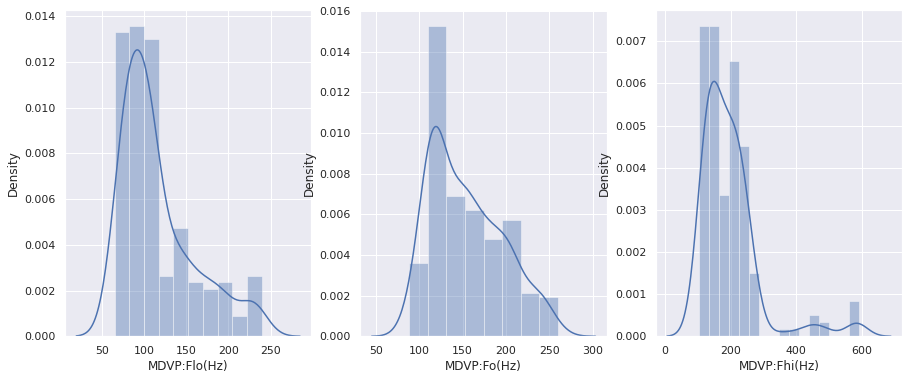

In [10]:
#the distribution of the features individually
print('The measures of vocal fundamental frequency')
fig, ax = plt.subplots(1,3,figsize=(15,6)) 
sns.distplot(data['MDVP:Flo(Hz)'],ax=ax[0]) 
sns.distplot(data['MDVP:Fo(Hz)'],ax=ax[1]) 
sns.distplot(data['MDVP:Fhi(Hz)'],ax=ax[2])

There is a positive skewness for minimum vocal fundemental frequency.

The high vocal frequency does not have any skewness.

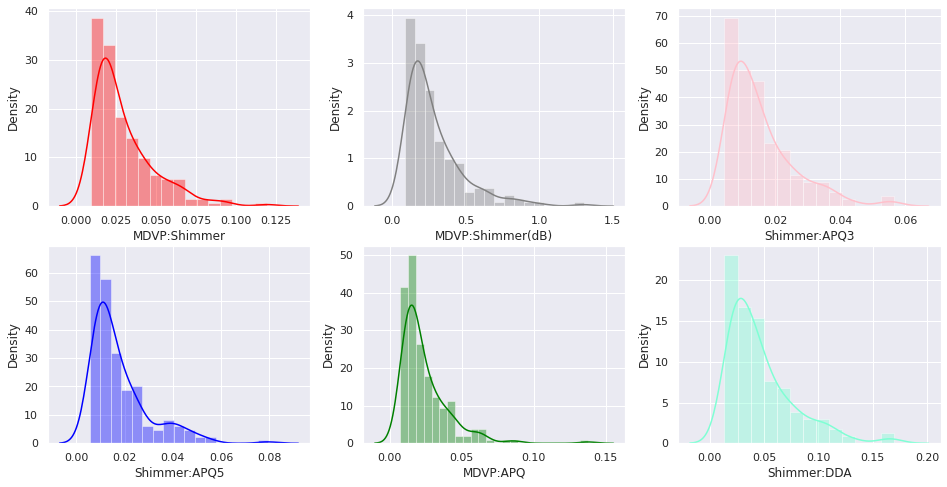

In [11]:
def distributionPlot(data):
    fig, ax = plt.subplots(2,3,figsize=(16,8)) 
    sns.distplot(data['MDVP:Shimmer'],ax=ax[0,0],color='red') 
    sns.distplot(data['MDVP:Shimmer(dB)'],ax=ax[0,1],color='gray') 
    sns.distplot(data['Shimmer:APQ3'],ax=ax[0,2],color='pink') 
    sns.distplot(data['Shimmer:APQ5'],ax=ax[1,0],color='blue') 
    sns.distplot(data['MDVP:APQ'],ax=ax[1,1],color='green') 
    sns.distplot(data['Shimmer:DDA'],ax=ax[1,2],color='Aquamarine')
    plt.show()
distributionPlot(data)

<AxesSubplot:xlabel='HNR', ylabel='Density'>

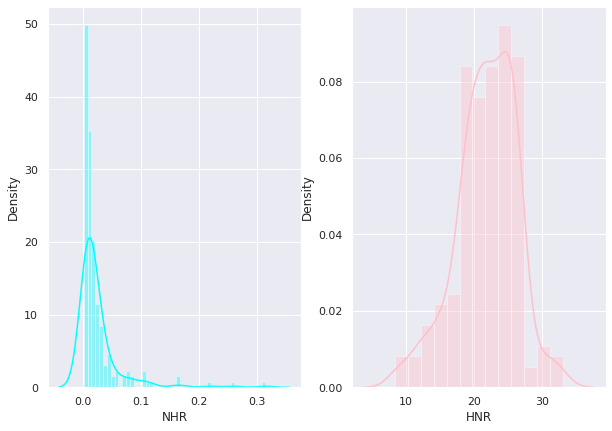

In [12]:
fig, ax = plt.subplots(1,2,figsize=(10,7)) 
sns.distplot(data['NHR'],ax=ax[0],color='cyan') 
sns.distplot(data['HNR'],ax=ax[1],color='pink')

The value NHR is positively skewed.

The value HNR looks like normally distributed

<AxesSubplot:ylabel='PPE'>

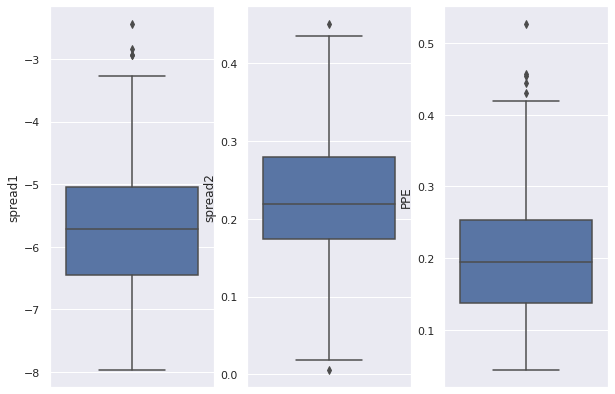

In [13]:
fig, ax = plt.subplots(1,3,figsize=(10,7)) 
sns.boxplot(y='spread1',data=data, ax=ax[0],orient='v') 
sns.boxplot(y='spread2',data=data, ax=ax[1],orient='v')
sns.boxplot(y='PPE',data=data,ax=ax[2],orient='v')

The three variations have outliers.

**Inferences :**

* Total number of records in the dataset 195
* Total number of features in the dataset 24
* There are no null values in the dataset
* There are no duplicates in the dataset
* Distribution of Parkinson disease people and healthy people are not uniformly distributed

**BiVariate Analysis**

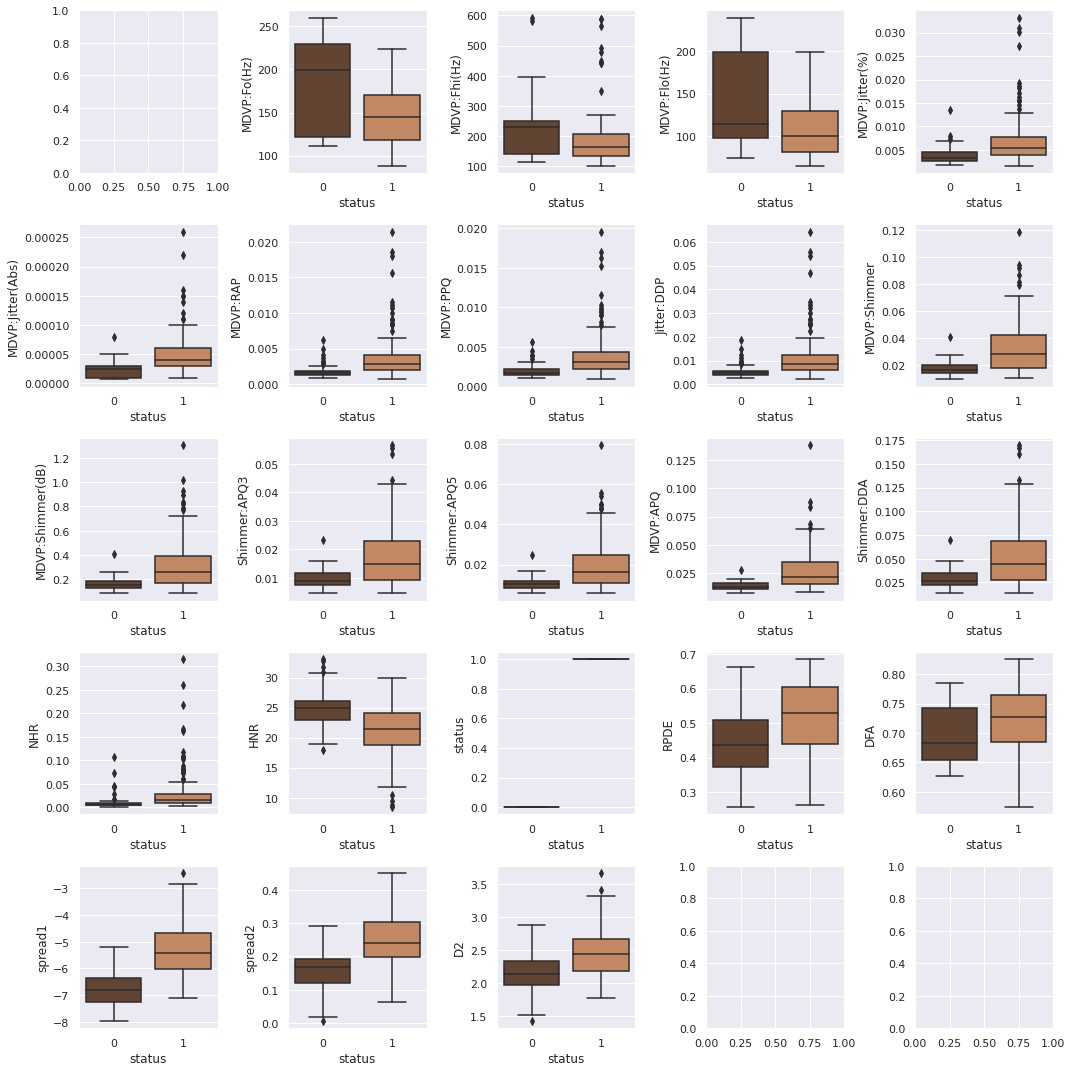

In [14]:
#Bivariate Analysis to study Dependencies
#outliers
fig,axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()

for i in range(1,len(data.columns)-1):
    sns.boxplot(x='status',y=data.iloc[:,i],data=data,orient='v',ax=axes[i],palette = 'copper')
plt.tight_layout()
plt.show()

The boxplot help us in identifying the difference in values with respect to the 'status' of the patient.

People who have PD (status = 1) have higher levels of Noise to Harmonic ratio (NHR) but they have lower levels of HNR (Harmonics to noise ratio) than the healthy people.

People who have PD tend to have higher jitter % (if the values goes above 0.15 we can confirm the patient is having PD )  

Spread1 is normally distributed between person who have PD and who is normal. People who have spread1 between - 8.5 and -7.5 are more and they are normal. People whose spread1 is between -6.5 and -5 are having PD

# feature engineering  

In [15]:
#Get the features and labels from the DataFrame ( 23 features and 1 label (statut))
features= data.drop(['status','name'], axis = 1)
#features=data.loc[:,data.columns!='status','name'].values[:,1:] #Selecting data by label or by a conditional statement [<row selection>,<column selection>]
labels=data.loc[:,'status'].values
#features=data.drop(['status','name'],axis=1)
#labels=data['status']

In [16]:
#Get the count of each label (0 and 1) in labels
print('number of parkinson people in the dataset:',labels[labels==1].shape[0])
print('number of Healthy people in the dataset: ',labels[labels==0].shape[0]) #The shape attribute for numpy arrays returns the dimensions of the array
#1 : 147 , 0 : 48

number of parkinson people in the dataset: 147
number of Healthy people in the dataset:  48


# Normalize data (data preprocessing)
Initialize a MinMaxScaler and scale the features between -1 and 1 to normalize them.
The MinMaxScaler transforms features by scaling them to a given range. The fit_transform() method fits to the data and then transforms it.We don't need to scale labels

In [17]:
#Scale the features to between -1 and 1 (normalisation)
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

In [18]:
#split the dataset into training and testing sets keeping 20% of the data for testing.
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=2)
print("{0:.1f}% data is in training set".format((len(x_train)/len(data)) * 100))
print("{0:.1f}% data is in testing set".format((len(x_test)/len(data)) * 100))
#overview of data
print(x_train.shape)
print(x_test.shape)

80.0% data is in training set
20.0% data is in testing set
(156, 22)
(39, 22)


# Build the Model

**XGBoost algorithm (extreme gradient boosting )**

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [19]:
#class_weights = ‘balanced’, the model automatically assigns the class weights inversely proportional to their respective frequencies.
#for a binary classifier
class_weight = {0: sum(y_train == 1)/len(y_train), 1: sum(y_train == 0)/len(y_train)}
print(class_weight)

{0: 0.7435897435897436, 1: 0.2564102564102564}


In [20]:
# define the model
model_xgboost=XGBClassifier()
# fit the model
model_xgboost.fit(x_train,y_train)

[19:52:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Make predictions and evaluate model

In [21]:
# **********make prediction ********** 

pred_xgboost=model_xgboost.predict(x_test)

#****** evaluate model ******

#accuracy metrix
acc=accuracy_score(y_test,pred_xgboost)*100
print('the accuracy of the model',acc)

# confusion matrix
c_matrix = confusion_matrix(y_test,pred_xgboost)
print('Confusion matrix : \n',c_matrix)

# outcome values order in sklearn
tn, fp, fn, tp = confusion_matrix(y_test,pred_xgboost).ravel()
print('Outcome values : \n', tn, fp, fn, tp)

# classification report for precision, recall f1-score and accuracy
cl_rep = classification_report(y_test,pred_xgboost)
print('Classification report : \n',cl_rep)

the accuracy of the model 82.05128205128204
Confusion matrix : 
 [[ 6  2]
 [ 5 26]]
Outcome values : 
 6 2 5 26
Classification report : 
               precision    recall  f1-score   support

           0       0.55      0.75      0.63         8
           1       0.93      0.84      0.88        31

    accuracy                           0.82        39
   macro avg       0.74      0.79      0.76        39
weighted avg       0.85      0.82      0.83        39



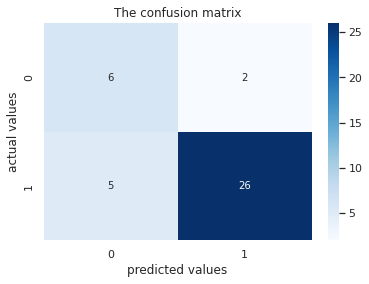

In [22]:
sns.heatmap(c_matrix,annot=True,cmap='Blues')
plt.title('The confusion matrix')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.show()

**KNN algorithm**  

In [23]:
from sklearn.neighbors import KNeighborsClassifier
#determine the optimum value of k 
train_score = []
test_score = []
k_vals = []

for k in range(1, 21):
    k_vals.append(k)
    mod_knn = KNeighborsClassifier(n_neighbors = k)
    mod_knn.fit(x_train, y_train)
    
    tr_score = mod_knn.score(x_train, y_train)
    train_score.append(tr_score)
    
    te_score = mod_knn.score(x_test, y_test)
    test_score.append(te_score)

# score that comes from the testing set only
 
max_test_score = max(test_score)
test_scores_ind = [i for i, v in enumerate(test_score) if v == max_test_score]
print('Max test score {} and k = {}'.format(max_test_score * 100, list(map(lambda n: n + 1, test_scores_ind))))
 

Max test score 94.87179487179486 and k = [11]


we have obtained the optimum value of k to be 11 with a score of 94.87. Now,we will fit the model

In [24]:
model_knn = KNeighborsClassifier(11)

model_knn.fit(x_train, y_train)
model_knn.score(x_test, y_test)*100

94.87179487179486

In [25]:
pred_knn=model_knn.predict(x_test)
 
#accuracy metrix
test_acc=accuracy_score(y_test,pred_knn)*100
print('the accuracy of the model',test_acc)

c_matrix = confusion_matrix(y_test,pred_knn)
print('Confusion matrix : \n',c_matrix)

# outcome values order in sklearn
tn, fp, fn, tp = confusion_matrix(y_test,pred_knn).reshape(-1)
print('Outcome values : \n', tn, fp, fn, tp)

# classification report for precision, recall f1-score and accuracy
cl_rep = classification_report(y_test,pred_knn)
print('Classification report : \n',cl_rep)

the accuracy of the model 94.87179487179486
Confusion matrix : 
 [[ 7  1]
 [ 1 30]]
Outcome values : 
 7 1 1 30
Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.97      0.97      0.97        31

    accuracy                           0.95        39
   macro avg       0.92      0.92      0.92        39
weighted avg       0.95      0.95      0.95        39



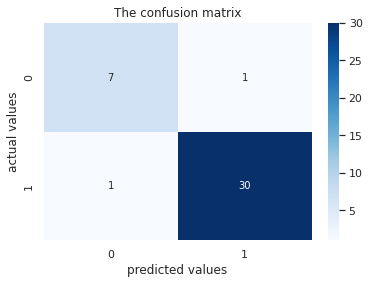

In [26]:
sns.heatmap(c_matrix, annot=True,cmap='Blues')
plt.title('The confusion matrix')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.show()

**SVM algorithm**

In [27]:
from sklearn.svm import SVC

model_svm = SVC(class_weight=class_weight)
#fit the model
model_svm.fit(x_train, y_train)

SVC(class_weight={0: 0.7435897435897436, 1: 0.2564102564102564})

In [28]:
pred_svm = model_svm.predict(x_test)
#accuracy metrix
test_acc=accuracy_score(y_test,pred_svm)*100
print('the accuracy of the model',test_acc)

c_matrix = confusion_matrix(y_test,pred_svm)
print('Confusion matrix : \n',c_matrix)

# outcome values order in sklearn
tn, fp, fn, tp = confusion_matrix(y_test,pred_svm).reshape(-1)
print('Outcome values : \n', tn, fp, fn, tp)

 

# classification report for precision, recall f1-score and accuracy
cl_rep = classification_report(y_test,pred_svm)
print('Classification report : \n',cl_rep)

the accuracy of the model 71.7948717948718
Confusion matrix : 
 [[ 8  0]
 [11 20]]
Outcome values : 
 8 0 11 20
Classification report : 
               precision    recall  f1-score   support

           0       0.42      1.00      0.59         8
           1       1.00      0.65      0.78        31

    accuracy                           0.72        39
   macro avg       0.71      0.82      0.69        39
weighted avg       0.88      0.72      0.74        39



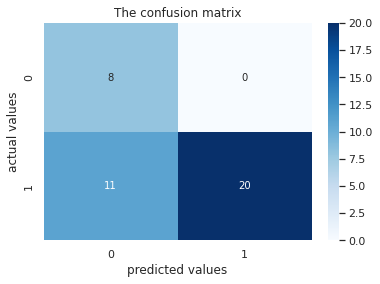

In [29]:
#Draw Confusion Matrix 
sns.heatmap(c_matrix, annot=True,cmap='Blues')
plt.title('The confusion matrix')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.show()

In [30]:
input_data=(244.99000,272.21000,239.17000,0.00451,0.00002,0.00279,0.00237,0.00837,0.01897,0.18100,0.01084,0.01121,0.01255,0.03253,0.01049,21.52800,0.522812,0.646818,-7.304500,0.171088,2.095237,0.096220)

#convert input data to  numpy array
input_data_array =np.asarray(input_data)

#reshape
input_data_reshape = input_data_array.reshape(1, -1)

#standardize data
sca_data =scaler.transform(input_data_reshape)

In [31]:
#prediction : KNN model
prediction = mod_knn.predict(sca_data)
print(prediction)

def pred(x):
    
    if (prediction == 1):
        
           Diagnosis = 'The patient has Parkinson'

    elif (prediction == 0):
        
           Diagnosis = 'The patient does not have Parkinson'
    else:
          print('error in processing')
    
    return Diagnosis 
        
pred(prediction)

[0]


'The patient does not have Parkinson'

In [32]:
#prediction : SVM model
prediction = model_svm.predict(sca_data)
print(prediction)
 
pred(prediction)

[0]


'The patient does not have Parkinson'

In [33]:
#prediction : xgboost model
prediction = model_xgboost.predict(sca_data)
print(prediction)

pred(prediction)

[0]


'The patient does not have Parkinson'

In [34]:
print(x_train.shape)

(156, 22)


**DNN Model ( with set class_weights)**

In [35]:
import tensorflow  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 

print('all packages are imported')

all packages are imported


In [36]:
#build the model

model_DNN=tensorflow.keras.models.Sequential([
    Dense(64,input_shape=(x_train.shape[1],),activation='relu'), 
     
    Dense(32,activation='relu'),  
    Dropout(0.5), # regularization method
     
    
    Dense(16,activation='relu'), 
    Dropout(0.5),
     
    
    Dense(8,activation='relu'), 
    Dropout(0.5),
    
    #Output layer
    Dense(1,activation='sigmoid')
])
#print(model_DNN.weights)
model_DNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1472      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0

2021-10-15 19:52:19.258211: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-15 19:52:19.259405: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-15 19:52:19.260033: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-15 19:52:19.261297: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

we have an unbalanced data,we set class weights to balance the loss in our model_DNN.fit

In [37]:
# Create an optimizer.
#opt = tensorflow.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)  
from tensorflow.keras import optimizers

#set class weight to balance the loss in model.fit
model_DNN.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy', tensorflow.keras.metrics.Recall()])   
tr = model_DNN.fit(x_train, y_train, epochs=150, batch_size=64,class_weight=class_weight)

2021-10-15 19:52:23.595762: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/150
3/3 [==============================] - 2s 6ms/step - loss: 0.3074 - accuracy: 0.4487 - recall: 0.3793
Epoch 2/150
3/3 [==============================] - 0s 5ms/step - loss: 0.2831 - accuracy: 0.4679 - recall: 0.3879
Epoch 3/150
3/3 [==============================] - 0s 5ms/step - loss: 0.2838 - accuracy: 0.4231 - recall: 0.3534
Epoch 4/150
3/3 [==============================] - 0s 4ms/step - loss: 0.2819 - accuracy: 0.4359 - recall: 0.3707
Epoch 5/150
3/3 [==============================] - 0s 5ms/step - loss: 0.2470 - accuracy: 0.5449 - recall: 0.4741
Epoch 6/150
3/3 [==============================] - 0s 5ms/step - loss: 0.2556 - accuracy: 0.5000 - recall: 0.4052
Epoch 7/150
3/3 [==============================] - 0s 5ms/step - loss: 0.2667 - accuracy: 0.4487 - recall: 0.3707
Epoch 8/150
3/3 [==============================] - 0s 5ms/step - loss: 0.2668 - accuracy: 0.4744 - recall: 0.4483
Epoch 9/150
3/3 [==============================] - 0s 5ms/step - loss: 0.2611 - accuracy

In [38]:
pred_DNN = model_DNN.predict(x_test)
 
# evaluate the model
test_acc=accuracy_score(y_test,pred_DNN.round())*100
print('the accuracy of the model',test_acc)

c_matrix = confusion_matrix(y_test,pred_DNN.round())
print('Confusion matrix : \n',c_matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,pred_DNN.round()).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
cl_rep = classification_report(y_test,pred_DNN.round())
print('Classification report : \n',cl_rep)

 

the accuracy of the model 74.35897435897436
Confusion matrix : 
 [[ 8  0]
 [10 21]]
Outcome values : 
 8 0 10 21
Classification report : 
               precision    recall  f1-score   support

           0       0.44      1.00      0.62         8
           1       1.00      0.68      0.81        31

    accuracy                           0.74        39
   macro avg       0.72      0.84      0.71        39
weighted avg       0.89      0.74      0.77        39



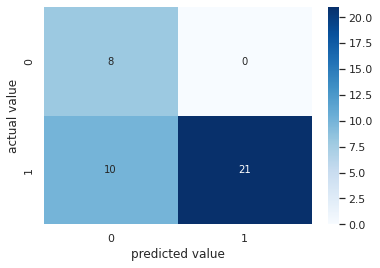

In [39]:
# visualize with seaborn library
sns.heatmap(c_matrix,annot=True,fmt="d" ,cmap='Blues') 
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

In [40]:
model_DNN.save_weights("model_DNN.h5")
print("Saved model to disk")

Saved model to disk
